# Dependencies


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import pandas as pd
from sklearn.model_selection import train_test_split

$y = mx + b$ 

For a given x, I want to predict the best possible y. In order to do that I want to have sucha  good combination of m and b that will help me to get the best possible y. 

The only thing that we can influence in b and m. We cant chage the x since it is a given data. 


Mean Squared Error:<br>
$E = \frac{1}{n}\sum_{i =1}^{n}(y_i - \hat{y_i})^{2}$ <br>
$  = \frac{1}{n}\sum_{i =1}^{n}(y_i - (wx + b))^{2}$


We need to change w and b to minimize the error.

How to do that ? <br>

$\frac{\partial E}{\partial w} = \frac{1}{n}\sum_{i = 1}^{n} 2(y_i - (wx_i + b)) (-x_i)$ <br>
$\frac{\partial E}{\partial w} = -\frac{2}{n}\sum_{i = 1}^{n} (x_i)(y_i - (wx_i + b)) $

<br>

$\frac{\partial E}{\partial b} = -\frac{2}{n}\sum_{i = 1}^{n}(y_i - (wx_i + b)) $


<br>
$\bbox[orange, 8px]{w = w -\alpha\frac{\partial E }{\partial w}}$
<br>
$\bbox[orange, 8px]{b = b -\alpha\frac{\partial E }{\partial b}}$

<hr>
$\alpha = \text{Learning Rate}$

# Linear Regression

In [2]:
class LinearRegression():
    def __init__(self,epoch, alpha):
        self.epoch = epoch
        self.alpha= alpha
        self.weights = None
        self.bias = None
        
    def cost_func(self,x,residuals):
        '''
        cost function: 
            Says how much our predictions are off from the actual output
        
        parameters:
            x = input data
            residuals = difference between predicted output - actual output
        
        We are basically taking the mean squared error
        '''
        #print(np.sum((residuals) ** 2)/(2*len(x)))
        return np.sum((residuals) ** 2)/(2*len(x))
        
    def fit(self,x,y_actuals):
        '''
        fit function: 
            takes the dataset and performs Linear Regression on them
        
        parameters:
            x = input data
            y_actuals = actual given output
        
        We are basically taking the mean squared error
        '''

        
        
        
        w_list = [[],[]]
        b_list = [[],[]]
        j = [[],[]]
        
        m, n_features = x.shape
        self.bias = 0
        self.weights = np.zeros(n_features)
        
        #Gradient Descend
        for i in range(self.epoch):
            
            y_predictions = np.dot(x,self.weights) + self.bias
            residuals = y_predictions - y_actuals

            
            dw = (1/m) *  np.dot(x.T, residuals)
            db = (1/m) * np.sum(residuals)
            
            #adjusting weights and bias
            self.weights = self.weights - (dw*self.alpha)
            self.bias = self.bias - (db*self.alpha)
            
            #Soting weights,bias and cost to visualize the progression of Gradient Descend
            w_list[0].append(self.weights)
            w_list[1].append(i)
            b_list[0].append(self.bias)
            b_list[1].append(i)
            j[0].append(self.cost_func(x,residuals))
            j[1].append(i)
        return w_list, b_list,j

       
    def predict(self,x):
        
        return np.dot(x, self.weights) + self.bias
    
    def MSE(self, y_test, predictions):
        return round(np.mean((y_test-predictions)**2),2)
    
    def RMSE(self, y_test, y_predictions):
        return round((np.mean((y_test-y_predictions)**2)**.5),2)
    
    def R2(self, y_actuals, y_predictions):
        RSS = np.sum((y_actuals - y_predicted)**2)
        return round((np.mean((y_test-predictions)**2)**.5),3)

# Dataset

In [3]:
def dataset(df, df_xs,df_y):
    
    df_temp = df.dropna()
    
    y = np.array(df[df_y],dtype=np.float64)  # Creating y
      
    df_temp = df[df_xs]
    X = df_temp.to_numpy(dtype=np.float64)      #Creating Xs
    
    if(X.ndim == 1):
        X = X.reshape(X.shape[0],1)
    
    if(X.shape[0] == y.shape[0]):
        print("Shape of X", X.shape," and the shape of y: ",y.shape)
    return X,y

In [4]:
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")
df = df.dropna()

X, y = dataset(df, ['YearsExperience'], 'Salary')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Shape of X (30, 1)  and the shape of y:  (30,)


# Model building

In [5]:
model = LinearRegression(epoch = 1000, alpha=0.0001) #1000 iteration and learning rate .001
w_list, b_list,j = model.fit(X_train,y_train)
predictions = model.predict(X_test)

mse = model.MSE(y_test, predictions)
print('MSE: ',mse)

rmse = model.RMSE(y_test, predictions)
print('RMSE: ',rmse)

MSE:  79237970.14
RMSE:  8901.57


# Data visualization

<AxesSubplot:title={'center':'Cost Function'}, xlabel='Epcoh', ylabel='value'>

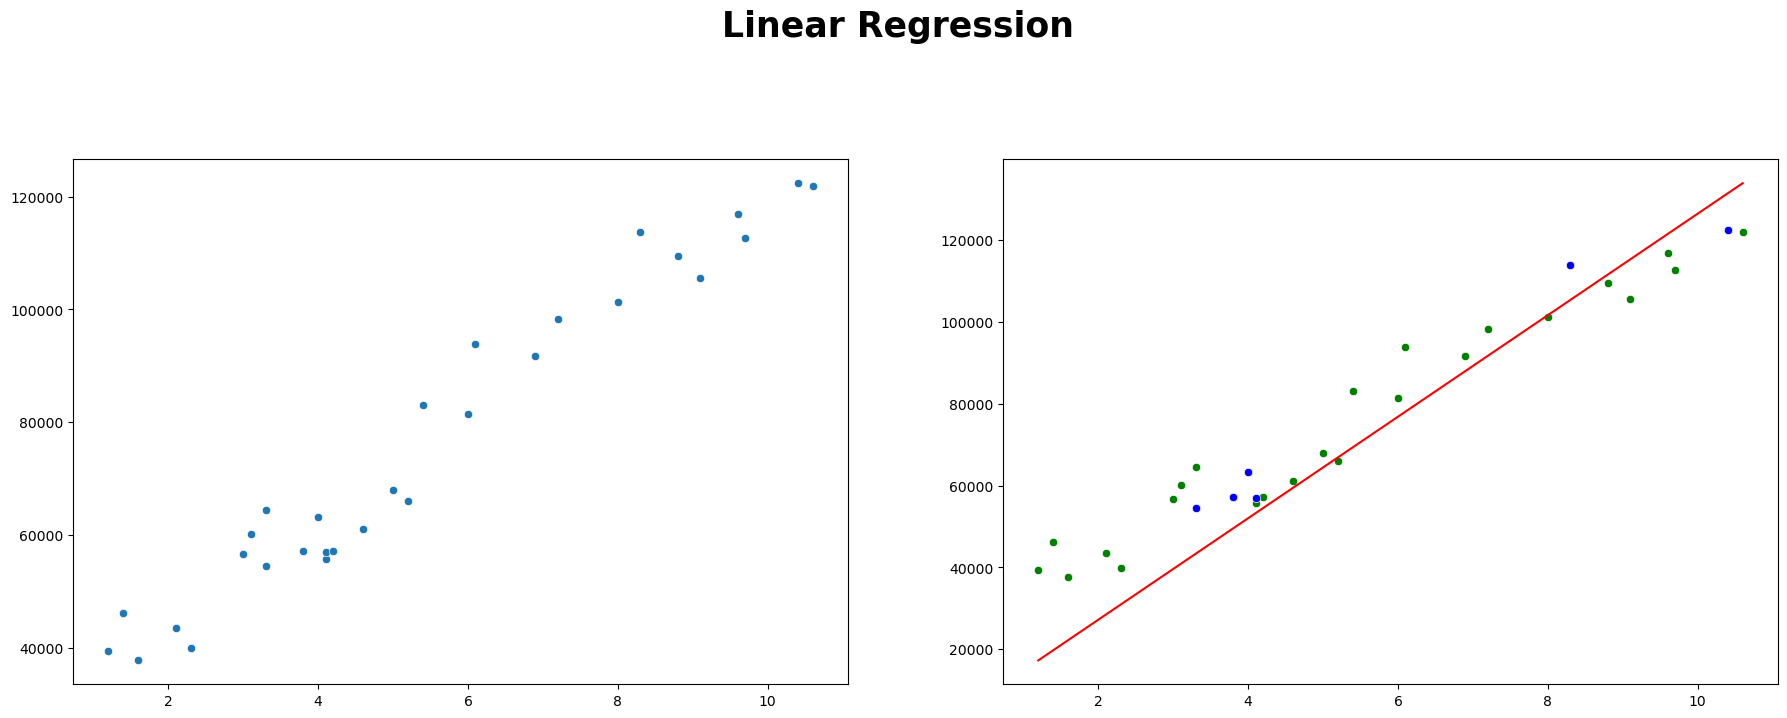

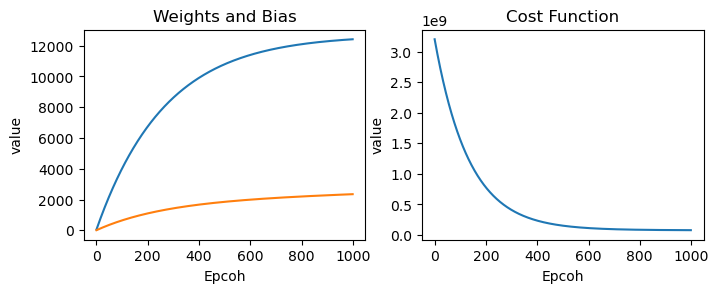

In [6]:
fig = plt.figure(figsize=(22,15))
plt.suptitle('Linear Regression', weight= 'bold', fontsize = 25)
grid = gridspec.GridSpec(nrows = 2, ncols = 2, figure = fig)

ax1 = plt.subplot(grid[0:1, 0:1])
sns.scatterplot(data = df, x = X.reshape(X.shape[0],), y = y, ax = ax1)

ax2 = plt.subplot(grid[0:1, 1:2])
y_pred_line = model.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x = X_train.reshape(X_train.shape[0],), y = y_train, ax = ax2, color = 'g')
sns.scatterplot(x = X_test.reshape(X_test.shape[0],), y = y_test, ax = ax2, color = 'b')
sns.lineplot(x= X.reshape(X.shape[0],), y = y_pred_line, ax = ax2, color = 'r')

ax3 = plt.subplot(grid[1:2,0:1])
ax3.set_xlabel('Epcoh')
ax3.set_ylabel('value')
plt.title('Weights and Bias')


wx = np.array(w_list[1])
wx = wx.reshape(wx.shape[0],)
wy = np.array(w_list[0])
wy = wy.reshape(wy.shape[0],)


bx = np.array(b_list[1])
bx = bx.reshape(bx.shape[0],)
by = np.array(b_list[0])
by = by.reshape(by.shape[0],)

sns.lineplot(x = wx,y =wy ,ax = ax3 )
sns.lineplot(x = bx,y =by, ax = ax3 )




ax4 = plt.subplot(grid[1:2,1:2])
ax4.set_xlabel('Epcoh')
ax4.set_ylabel('value')
plt.title('Cost Function')
jx = np.array(j[1])
jx = jx.reshape(jx.shape[0],)
jy = np.array(j[0])
jy = jy.reshape(jy.shape[0],)

sns.lineplot(x = jx,y =jy ,ax = ax4)

<hr>